In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_tk=pd.read_csv("takehome_users.csv",encoding='ISO-8859-1') #importing the necessary files supplied
df_tkuser=pd.read_csv("takehome_user_engagement.csv") 

In [4]:
df_tk.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
print(df_tkuser.shape) #checking the shape and sample
df_tkuser.head()

(207917, 3)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df_tkuser['time_stamp']=pd.to_datetime(df_tkuser['time_stamp']) # converting the timestamp column into datetime data type


In [8]:
df_tkuser=df_tkuser.set_index('time_stamp') # setting time_stamp as index inorder to group it asper our needs

In [9]:
df_tkuser.index #validating the indexes

DatetimeIndex(['2014-04-22 03:53:30', '2013-11-15 03:45:04',
               '2013-11-29 03:45:04', '2013-12-09 03:45:04',
               '2013-12-25 03:45:04', '2013-12-31 03:45:04',
               '2014-01-08 03:45:04', '2014-02-03 03:45:04',
               '2014-02-08 03:45:04', '2014-02-09 03:45:04',
               ...
               '2014-04-28 14:22:45', '2014-05-17 14:22:45',
               '2014-05-30 14:22:45', '2014-04-11 19:39:56',
               '2013-10-22 13:33:17', '2013-09-06 06:14:15',
               '2013-01-15 18:28:37', '2014-04-27 12:45:16',
               '2012-06-02 11:55:59', '2014-01-26 08:57:12'],
              dtype='datetime64[ns]', name='time_stamp', length=207917, freq=None)

In [10]:
df_tkuser.sort_values(by='time_stamp').head(5) #checking whether the data is sorting based on the index 

,user_id,visited
time_stamp,,
2012-05-31 08:20:06,10012,1
2012-05-31 15:47:36,3428,1
2012-05-31 17:19:37,9899,1
2012-05-31 21:58:33,1693,1
2012-06-01 00:17:30,6102,1


In [11]:
#grouping the user data by multiple values , year, week and user_id and aggregating it with visited column in order to get count of user's logging in on weekly basis
adopteduser=df_tkuser.groupby([df_tkuser.index.year,df_tkuser.index.week,'user_id'])['visited'].count() 

#converting the series into dataframe and resetting the index inorder to break multi-index into columns
adopteduser=adopteduser.to_frame().reset_index(level="user_id")
adopteduser

user_id  visited
time_stamp time_stamp                  
2012       1                69        1
           1               197        1
           1               445        1
           1               510        1
           1               639        1
...                        ...      ...
2014       23            11869        1
           23            11885        1
           23            11895        3
           23            11906        1
           23            11924        3

[69277 rows x 2 columns]

In [12]:
#locating only users who have logged in >= 3 times in a 7 day window.
adopteduser.loc[adopteduser['visited']>=3]['user_id']

time_stamp  time_stamp
2012        23             1693
            24              728
            24            11764
            25             1693
            25             5297
                          ...  
2014        23            11573
            23            11688
            23            11806
            23            11895
            23            11924
Name: user_id, Length: 33816, dtype: int64

Top inviters :- invited_by_user_id
10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
8068.0     10
7012.0     10
6370.0     10
4803.0     10
2354.0     10
10481.0    10
10628.0    10
4302.0     10
1175.0     10
4612.0     10
Name: name, dtype: int64


<AxesSubplot: ylabel='Count'>

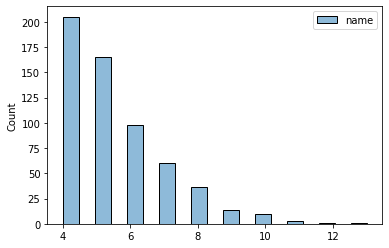

In [3]:
topc=df_tk.groupby('invited_by_user_id')['name'].count().sort_values(ascending=False)
newtopc=topc.loc[topc>3]
print("Top inviters :-", newtopc.loc[newtopc>9])
newtopc=newtopc.to_frame()
sns.histplot(data=newtopc)

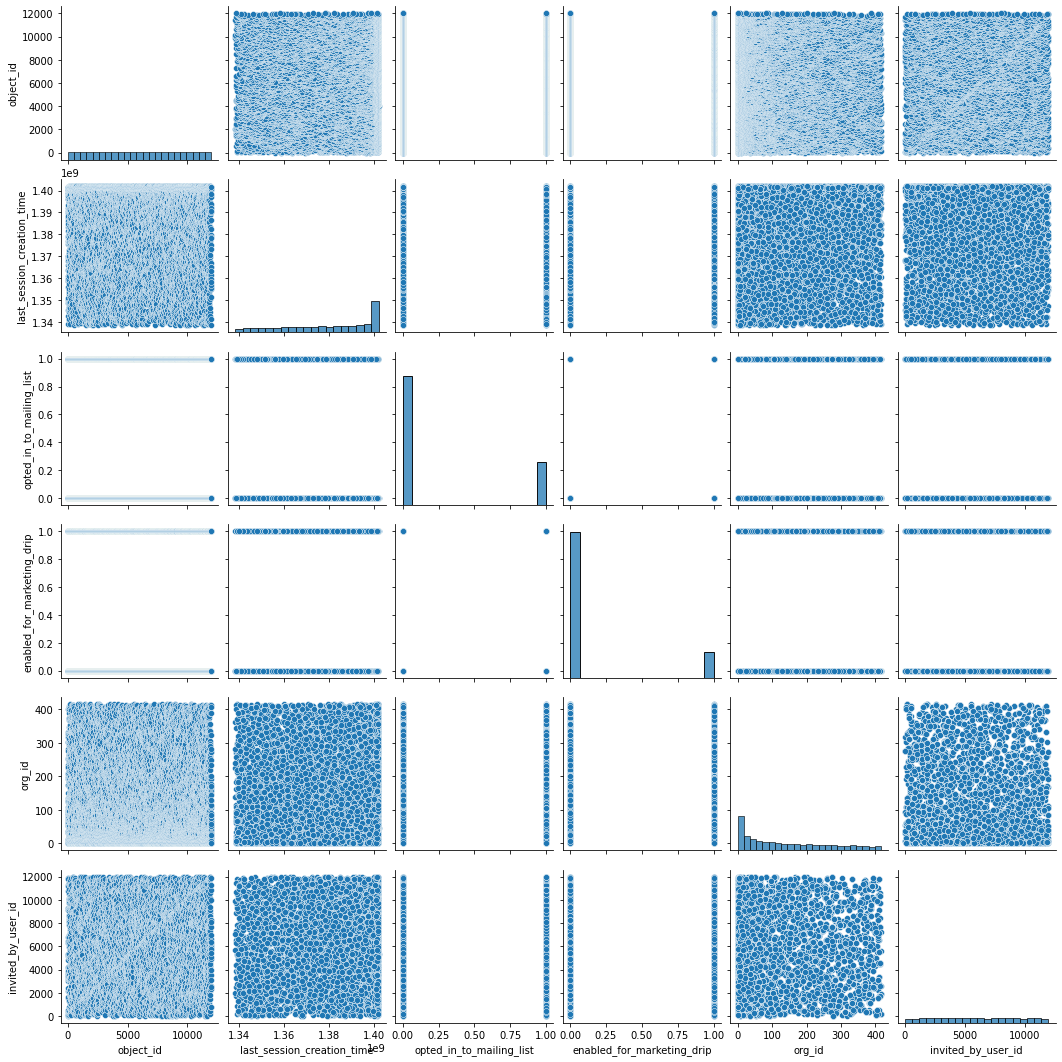

In [15]:
sns.pairplot(df_tk)

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64


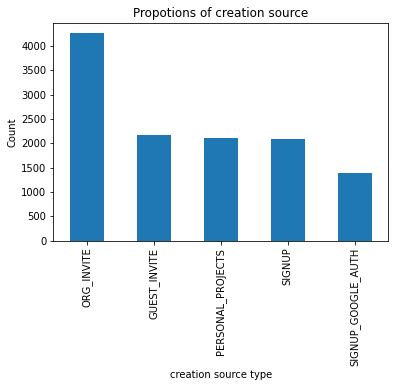

In [13]:
df_tk.creation_source.value_counts().plot(kind="bar")
propotions=df_tk.creation_source.value_counts()
print(propotions)
plt.title("Propotions of creation source")
plt.xlabel("creation source type")
plt.ylabel("Count")
plt.show()

([<matplotlib.patches.Wedge at 0x296bc2dde10>,
 [Text(0.4854841827420264, 0.9870689481020598, 'ORG_INVITE'),
  Text(-1.0340880226283247, 0.3750492787043347, 'GUEST_INVITE'),
  Text(-0.7889361980376236, -0.7665374585928204, 'PERSONAL_PROJECTS'),
  Text(0.3242700384398203, -1.0511179487432596, 'SIGNUP'),
  Text(1.0284786014440943, -0.39016889467460103, 'SIGNUP_GOOGLE_AUTH')],
 [Text(0.26480955422292346, 0.5384012444193053, '35%'),
  Text(-0.5640480123427225, 0.204572333838728, '18%'),
  Text(-0.43032883529324917, -0.41811134105062925, '18%'),
  Text(0.17687456642172011, -0.5733370629508688, '17%'),
  Text(0.560988328060415, -0.2128193970952369, '12%')])

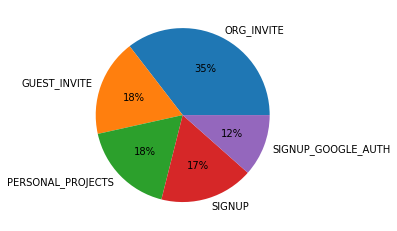

In [14]:
plt.pie((df_tk.creation_source.value_counts()),labels=propotions.index ,autopct='%.0f%%')